# Case
### Assume that you are employed to help a credit card company to detect potential fraud cases so that the customers are ensured that they won’t be charged for the items they did not purchase. You are given a dataset containing the transactions between people, the information that they are fraud or not, and you are asked to differentiate between them. This is the case we are going to deal with. Our ultimate intent is to tackle this situation by building classification models to classify and distinguish fraud transactions.

## Content

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification.



## Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.
More details on current and past projects on related topics are available on https://www.researchgate.net/project/Fraud-detection-5 and the page of the DefeatFraud project

Please cite the following works:

Andrea Dal Pozzolo, Olivier Caelen, Reid A. Johnson and Gianluca Bontempi. Calibrating Probability with Undersampling for Unbalanced Classification. In Symposium on Computational Intelligence and Data Mining (CIDM), IEEE, 2015

Dal Pozzolo, Andrea; Caelen, Olivier; Le Borgne, Yann-Ael; Waterschoot, Serge; Bontempi, Gianluca. Learned lessons in credit card fraud detection from a practitioner perspective, Expert systems with applications,41,10,4915-4928,2014, Pergamon

Dal Pozzolo, Andrea; Boracchi, Giacomo; Caelen, Olivier; Alippi, Cesare; Bontempi, Gianluca. Credit card fraud detection: a realistic modeling and a novel learning strategy, IEEE transactions on neural networks and learning systems,29,8,3784-3797,2018,IEEE

Dal Pozzolo, Andrea Adaptive Machine learning for credit card fraud detection ULB MLG PhD thesis (supervised by G. Bontempi)

Carcillo, Fabrizio; Dal Pozzolo, Andrea; Le Borgne, Yann-Aël; Caelen, Olivier; Mazzer, Yannis; Bontempi, Gianluca. Scarff: a scalable framework for streaming credit card fraud detection with Spark, Information fusion,41, 182-194,2018,Elsevier

Carcillo, Fabrizio; Le Borgne, Yann-Aël; Caelen, Olivier; Bontempi, Gianluca. Streaming active learning strategies for real-life credit card fraud detection: assessment and visualization, International Journal of Data Science and Analytics, 5,4,285-300,2018,Springer International Publishing

Bertrand Lebichot, Yann-Aël Le Borgne, Liyun He, Frederic Oblé, Gianluca Bontempi Deep-Learning Domain Adaptation Techniques for Credit Cards Fraud Detection, INNSBDDL 2019: Recent Advances in Big Data and Deep Learning, pp 78-88, 2019

Fabrizio Carcillo, Yann-Aël Le Borgne, Olivier Caelen, Frederic Oblé, Gianluca Bontempi Combining Unsupervised and Supervised Learning in Credit Card Fraud Detection Information Sciences, 2019

Yann-Aël Le Borgne, Gianluca Bontempi Reproducible machine Learning for Credit Card Fraud Detection - Practical Handbook

Bertrand Lebichot, Gianmarco Paldino, Wissam Siblini, Liyun He, Frederic Oblé, Gianluca Bontempi Incremental learning strategies for credit cards fraud detection, IInternational Journal of Data Science and Analytics

## Importing the Packages

In [1]:
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from termcolor import colored as cl # text customization
import itertools # advanced tools

from sklearn.preprocessing import StandardScaler # data normalization
from sklearn.model_selection import train_test_split # data split
from sklearn.tree import DecisionTreeClassifier # Decision tree algorit
from sklearn.linear_model import LogisticRegression # Logistic regression algorithm
from sklearn.svm import SVC # SVM algorithm
from sklearn.ensemble import RandomForestClassifier # Random forest tree algorithm
from xgboost import XGBClassifier # XGBoost algorithm

from sklearn.metrics import confusion_matrix # evaluation metric
from sklearn.metrics import accuracy_score # evaluation metric
from sklearn.metrics import f1_score # evaluation metric


## Importing Data

In [2]:
df = pd.read_csv('creditcard.csv')
df.drop('Time', axis = 1, inplace = True)

print(df.head())



         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10  ...       V21       V22       V23       V24  \
0  0.098698  0.363787  0.090794  ... -0.018307  0.277838 -0.110474  0.066928   
1  0.085102 -0.255425 -0.166974  ... -0.225775 -0.638672  0.101288 -0.339846   
2  0.247676 -1.514654  0.207643  ...  0.247998  0.771679  0.909412 -0.689281   
3  0.377436 -1.387024 -0.054952  ... -0.108300  0.005274 -0.190321 -1.175575   
4 -0.270533  0.817739  0.753074  ... -0.009431  0.798278 -0.137458  0.141267   

        V25       V26       V27       V28  Amount  Class  
0  0.1285

## Data Processing and EDA

In [4]:

cases = len(df)
nonfraud_count = len(df[df.Class == 0])
fraud_count = len(df[df.Class == 1])
fraud_percentage = round(fraud_count/nonfraud_count*100, 2)

print(cl('CASE COUNT', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('Total number of cases are {}'.format(cases), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(nonfraud_count), attrs = ['bold']))
print(cl('Number of Non-fraud cases are {}'.format(fraud_count), attrs = ['bold']))
print(cl('Percentage of fraud cases is {}'.format(fraud_percentage), attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))

CASE COUNT
--------------------------------------------
Total number of cases are 284807
Number of Non-fraud cases are 284315
Number of Non-fraud cases are 492
Percentage of fraud cases is 0.17
--------------------------------------------


In [5]:
nonfraud_cases = df[df.Class == 0]
fraud_cases = df[df.Class == 1]

print(cl('CASE AMOUNT STATISTICS', attrs = ['bold']))
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('NON-FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(nonfraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))
print(cl('FRAUD CASE AMOUNT STATS', attrs = ['bold']))
print(fraud_cases.Amount.describe())
print(cl('--------------------------------------------', attrs = ['bold']))

CASE AMOUNT STATISTICS
--------------------------------------------
NON-FRAUD CASE AMOUNT STATS
count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64
--------------------------------------------
FRAUD CASE AMOUNT STATS
count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64
--------------------------------------------


In [6]:

sc = StandardScaler()
amount = df['Amount'].values

df['Amount'] = sc.fit_transform(amount.reshape(-1, 1))

print(cl(df['Amount'].head(10), attrs = ['bold']))

0    0.244964
1   -0.342475
2    1.160686
3    0.140534
4   -0.073403
5   -0.338556
6   -0.333279
7   -0.190107
8    0.019392
9   -0.338516
Name: Amount, dtype: float64


## Feature Selection & Data Split

In [7]:

# DATA SPLIT

X = df.drop('Class', axis = 1).values
y = df['Class'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

print(cl('X_train samples : ', attrs = ['bold']), X_train[:1])
print(cl('X_test samples : ', attrs = ['bold']), X_test[0:1])
print(cl('y_train samples : ', attrs = ['bold']), y_train[0:20])
print(cl('y_test samples : ', attrs = ['bold']), y_test[0:20])

X_train samples :  [[-1.11504743  1.03558276  0.80071244 -1.06039825  0.03262117  0.85342216
  -0.61424348 -3.23116112  1.53994798 -0.81690879 -1.30559201  0.1081772
  -0.85960958 -0.07193421  0.90665563 -1.72092961  0.79785322 -0.0067594
   1.95677806 -0.64489556  3.02038533 -0.53961798  0.03315649 -0.77494577
   0.10586781 -0.43085348  0.22973694 -0.0705913  -0.30145418]]
X_test samples :  [[-0.32333357  1.05745525 -0.04834115 -0.60720431  1.25982115 -0.09176072
   1.1591015  -0.12433461 -0.17463954 -1.64440065 -1.11886302  0.20264731
   1.14596495 -1.80235956 -0.24717793 -0.06094535  0.84660574  0.37945439
   0.84726224  0.18640942 -0.20709827 -0.43389027 -0.26161328 -0.04665061
   0.2115123   0.00829721  0.10849443  0.16113917 -0.19330595]]
y_train samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
y_test samples :  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [13]:
np.shape(X_train)

(227845, 29)

## Modeling

In [14]:
# 1. Decision Tree

tree_model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy')
tree_model.fit(X_train, y_train)
tree_yhat = tree_model.predict(X_test)


# 2. Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_yhat = lr.predict(X_test)


# 3. SVM 

svm = SVC()
svm.fit(X_train, y_train)
svm_yhat = svm.predict(X_test)

# 4. Random Forest Tree

rf = RandomForestClassifier(max_depth = 4)
rf.fit(X_train, y_train)
rf_yhat = rf.predict(X_test)

# 5. XGBoost

xgb = XGBClassifier(max_depth = 4)
xgb.fit(X_train, y_train)
xgb_yhat = xgb.predict(X_test)

## Evaluation

### Accuracy Score

In [15]:
# 1. Accuracy score

print(cl('ACCURACY SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Decision Tree model is {}'.format(accuracy_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
# print(cl('Accuracy score of the KNN model is {}'.format(accuracy_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
# print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Logistic Regression model is {}'.format(accuracy_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the SVM model is {}'.format(accuracy_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the Random Forest Tree model is {}'.format(accuracy_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('Accuracy score of the XGBoost model is {}'.format(accuracy_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

ACCURACY SCORE
------------------------------------------------------------------------
Accuracy score of the Decision Tree model is 0.9993679997191109
------------------------------------------------------------------------
Accuracy score of the Logistic Regression model is 0.9991924440855307
------------------------------------------------------------------------
Accuracy score of the SVM model is 0.9993153330290369
------------------------------------------------------------------------
Accuracy score of the Random Forest Tree model is 0.9993153330290369
------------------------------------------------------------------------
Accuracy score of the XGBoost model is 0.9994908886626171
------------------------------------------------------------------------


### F1 Score


In [16]:
# 2. F1 score

print(cl('F1 SCORE', attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Decision Tree model is {}'.format(f1_score(y_test, tree_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
# print(cl('F1 score of the KNN model is {}'.format(f1_score(y_test, knn_yhat)), attrs = ['bold'], color = 'green'))
# print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Logistic Regression model is {}'.format(f1_score(y_test, lr_yhat)), attrs = ['bold'], color = 'red'))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the SVM model is {}'.format(f1_score(y_test, svm_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the Random Forest Tree model is {}'.format(f1_score(y_test, rf_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))
print(cl('F1 score of the XGBoost model is {}'.format(f1_score(y_test, xgb_yhat)), attrs = ['bold']))
print(cl('------------------------------------------------------------------------', attrs = ['bold']))

F1 SCORE
------------------------------------------------------------------------
F1 score of the Decision Tree model is 0.8105263157894738
------------------------------------------------------------------------
F1 score of the Logistic Regression model is 0.7356321839080459
------------------------------------------------------------------------
F1 score of the SVM model is 0.7771428571428572
------------------------------------------------------------------------
F1 score of the Random Forest Tree model is 0.7796610169491525
------------------------------------------------------------------------
F1 score of the XGBoost model is 0.8449197860962566
------------------------------------------------------------------------


### Confusion Matrix

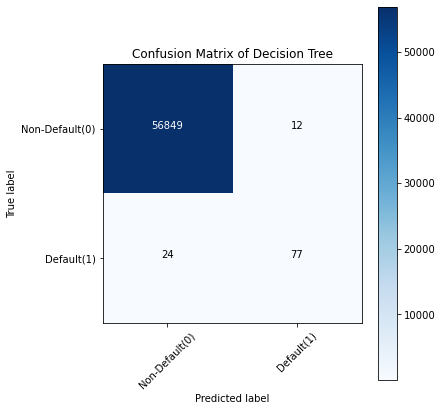

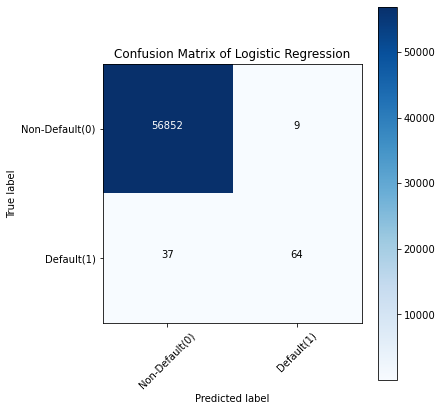

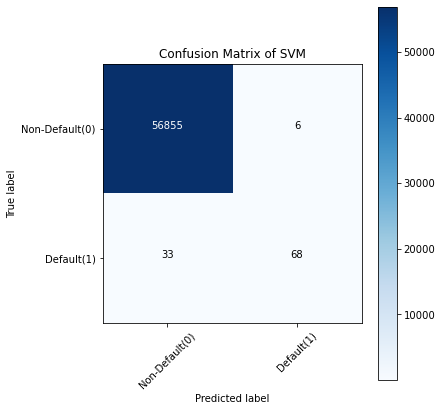

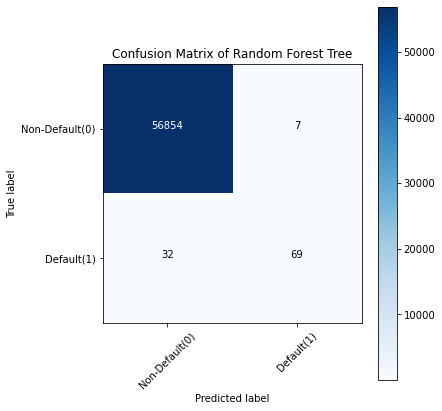

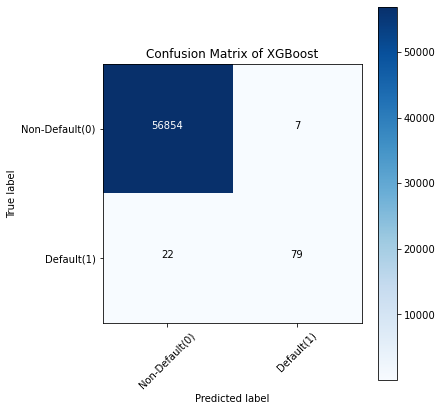

In [17]:
# 3. Confusion Matrix

# defining the plot function

def plot_confusion_matrix(cm, classes, title, normalize = False, cmap = plt.cm.Blues):
    title = 'Confusion Matrix of {}'.format(title)
    if normalize:
        cm = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix for the models

tree_matrix = confusion_matrix(y_test, tree_yhat, labels = [0, 1]) # Decision Tree
# knn_matrix = confusion_matrix(y_test, knn_yhat, labels = [0, 1]) # K-Nearest Neighbors
lr_matrix = confusion_matrix(y_test, lr_yhat, labels = [0, 1]) # Logistic Regression
svm_matrix = confusion_matrix(y_test, svm_yhat, labels = [0, 1]) # Support Vector Machine
rf_matrix = confusion_matrix(y_test, rf_yhat, labels = [0, 1]) # Random Forest Tree
xgb_matrix = confusion_matrix(y_test, xgb_yhat, labels = [0, 1]) # XGBoost

# Plot the confusion matrix

plt.rcParams['figure.figsize'] = (6, 6)

# 1. Decision tree

tree_cm_plot = plot_confusion_matrix(tree_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Decision Tree')
plt.savefig('tree_cm_plot.png')
plt.show()

# # 2. K-Nearest Neighbors

# knn_cm_plot = plot_confusion_matrix(knn_matrix, 
#                                 classes = ['Non-Default(0)','Default(1)'], 
#                                 normalize = False, title = 'KNN')
# plt.savefig('knn_cm_plot.png')
# plt.show()

# 2. Logistic regression

lr_cm_plot = plot_confusion_matrix(lr_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Logistic Regression')
plt.savefig('lr_cm_plot.png')
plt.show()

# 3. Support Vector Machine

svm_cm_plot = plot_confusion_matrix(svm_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'SVM')
plt.savefig('svm_cm_plot.png')
plt.show()

# 4. Random forest tree

rf_cm_plot = plot_confusion_matrix(rf_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'Random Forest Tree')
plt.savefig('rf_cm_plot.png')
plt.show()

# 5. XGBoost

xgb_cm_plot = plot_confusion_matrix(xgb_matrix, 
                                classes = ['Non-Default(0)','Default(1)'], 
                                normalize = False, title = 'XGBoost')
plt.savefig('xgb_cm_plot.png')
plt.show()